<a href="https://colab.research.google.com/github/swetha2348568/ML_assignments/blob/main/2348568_lab1_aml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
df=pd.read_csv('/content/drive/MyDrive/Program_1_Dataset.csv')
df.head()

,Crime_Rate,Zone_proportion,Non_Retail_Acres,CHAS,NOX,Avg_rooms,AGE,Distance,RAD,Property_TaxRate,PTRATIO,B,LSTAT,MValue
0,0.06860,0.0,2.89,0,0.445,7.416,62.5,3.4952,2,276,18.0,396.90,6.19,33.2
1,0.14866,0.0,8.56,0,0.520,6.727,79.9,2.7778,5,384,20.9,394.76,9.42,27.5
2,0.11432,0.0,8.56,0,0.520,6.781,71.3,2.8561,5,384,20.9,395.58,7.67,26.5
3,0.22876,0.0,8.56,0,0.520,6.405,85.4,2.7147,5,384,20.9,70.80,10.63,18.6
4,0.21161,0.0,8.56,0,0.520,6.137,87.4,2.7147,5,384,20.9,394.47,13.44,19.3


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Crime_Rate        506 non-null    float64
 1   Zone_proportion   506 non-null    float64
 2   Non_Retail_Acres  506 non-null    float64
 3   CHAS              506 non-null    int64  
 4   NOX               506 non-null    float64
 5   Avg_rooms         506 non-null    float64
 6   AGE               506 non-null    float64
 7   Distance          506 non-null    float64
 8   RAD               506 non-null    int64  
 9   Property_TaxRate  506 non-null    int64  
 10  PTRATIO           506 non-null    float64
 11  B                 506 non-null    float64
 12  LSTAT             506 non-null    float64
 13  MValue            506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [4]:
df.shape

(506, 14)

In [5]:
df=df.drop(['CHAS','Zone_proportion'],axis=1)

In [6]:
mean_val=df['MValue'].mean()
mean_val

22.532806324110673

In [7]:
# Print the list of column names
print(df.columns)


Index(['Crime_Rate', 'Non_Retail_Acres', 'NOX', 'Avg_rooms ', 'AGE',
       'Distance', 'RAD', 'Property_TaxRate', 'PTRATIO', 'B', 'LSTAT',
       'MValue'],
      dtype='object')


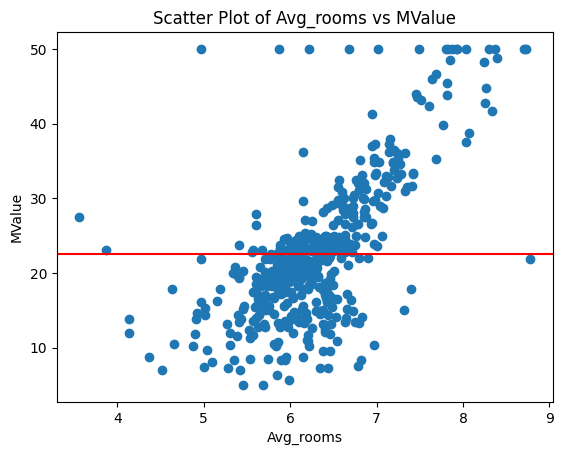

In [8]:
plt.scatter(df['Avg_rooms '], df['MValue'])
plt.axhline(y=mean_val,color='red')
#annotate x and y labels
plt.annotate("Avg. MValue", xy=(1,mean_val+2.5))
plt.title('Scatter Plot of Avg_rooms vs MValue')
plt.xlabel('Avg_rooms')
plt.ylabel('MValue')
plt.show()

In [20]:
X = df['Avg_rooms ']  # Predictor
Y = df['MValue']  # Target variable

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [36]:
df1=pd.concat([X_train,Y_train],axis=1)

In [40]:
print(df1.columns)

Index(['Avg_rooms ', 'MValue', 'Min_model1', 'Min_model2', 'Min_model3'], dtype='object')


In [37]:
min_model1=Y_train.mean()
min_model2=10+12*X_train
min_model3=6+18*X_train
#y=c+mx
print(min_model1)
print(min_model2)
print(min_model3)

22.675706214689264
5      84.004
116    84.184
45     68.836
16     81.136
468    89.884
        ...  
106    80.692
270    90.196
348    82.228
435    84.784
102    83.944
Name: Avg_rooms , Length: 354, dtype: float64
5      117.006
116    117.276
45      94.254
16     112.704
468    125.826
        ...   
106    112.038
270    126.294
348    114.342
435    118.176
102    116.916
Name: Avg_rooms , Length: 354, dtype: float64


In [38]:
df1['Min_model1']=min_model1
df1['Min_model2']=min_model2
df1['Min_model3']=min_model3


In [ ]:
fig, ax=plt.subplots()
ax.scatter(x='Avg rooms',y='MValue',data=df, label='Actual Time Taken')

ax.plot(df['Units'],df['Min_model1'],color='red', label='Model_1')
ax.plot(df['Units'],df['Min_model2'],color='green', label='Model_2')
ax.plot(df['Units'],df['Min_model3'],color='blue', label='Model_3')

ax.set_xlabel('Units')
ax.set_ylabel('Time taken')
ax.set_title('Model Comparison')

In [39]:
x=X_train
y=Y_train

xy=x*y
n=len(df1)

xmean=X_train.mean()
ymean=Y_train.mean()

numerator=xy.sum() - n*xmean*ymean
denom=(x**2).sum() - n*(xmean**2)

m=numerator/denom
c=ymean - (m*xmean)
print('intercept-c:', c, 'Coefficient-m:',m)

intercept-c: -33.51014759751379 Coefficient-m: 8.926202222337855


In [14]:
from sklearn.linear_model import LinearRegression

In [15]:
model=LinearRegression()

In [17]:
model.fit(X_train, Y_train)

LinearRegression()

In [19]:
print('Intercept:',model.intercept_)
print('Coefficients:',model.coef_)

Intercept: -33.510147597513345
Coefficients: [8.92620222]
